In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from config import weatherKey
from citipy import citipy
from scipy.stats import linregress

weatherAPIurl = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weatherKey}&q="
outputPath = "./output/cities.csv"


In [3]:
citiesTargetTotal = 500
cityCoordinateList = []
cityUsedList = []

#generate random list of coordinates
cityLatRand = np.random.uniform(low = -90, high = 90, size = (citiesTargetTotal*3))
cityLongRand = np.random.uniform(low = -90, high = 90, size = (citiesTargetTotal*3))
cityCoordinateList = zip(cityLatRand, cityLongRand)

#associate each coordinate with nearest city
for x in cityCoordinateList:
    city = citipy.nearest_city(x[0], x[1]).city_name
    
    if city not in cityUsedList:
        cityUsedList.append(city)

In [4]:
cityWeather = []
print("Retrieving data from openweathermap.org")
print("---------------------------------------")

recordCount = 1
setCount = 1

for index, city in enumerate(cityUsedList):
    if(index % 50 == 0 and index >= 50):
        
        recordCount = 0
        setCount += 1
            
    lookupURL = weatherAPIurl + city
    
    print(f'Gathering Record {recordCount} of Set {setCount} |{city}')
    
    recordCount += 1
          
    try:
        response = requests.get(lookupURL).json()
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        maxTemperature = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudCoverage = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]
        
        cityWeather.append({"City:" : city,
                           "Latitude:" : latitude,
                           "Longitude:" : longitude,
                           "Max Temp:" : maxTemperature,
                           "Humidity:" : humidity,
                           "Cloud Coverage:" : cloudCoverage,
                           "Wind:" : wind,
                           "Country:" : country,
                           "Date:" : date,            
                           })
    except:
        print(f'{city} not found in data set')
        continue
              
print("---------------------------------------")  
print("Data retrieval complete!")

Retrieving data from openweathermap.org
---------------------------------------
Gathering Record 1 of Set 1 |ponta do sol
Gathering Record 2 of Set 1 |richards bay
Gathering Record 3 of Set 1 |muyezerskiy
Gathering Record 4 of Set 1 |saint george
Gathering Record 5 of Set 1 |dzhusaly
dzhusaly not found in data set
Gathering Record 6 of Set 1 |saint-pierre
Gathering Record 7 of Set 1 |salalah
Gathering Record 8 of Set 1 |kidal
Gathering Record 9 of Set 1 |clyde river
Gathering Record 10 of Set 1 |cyangugu
Gathering Record 11 of Set 1 |bergen
Gathering Record 12 of Set 1 |bengkulu
Gathering Record 13 of Set 1 |morondava
Gathering Record 14 of Set 1 |bondo
Gathering Record 15 of Set 1 |sacramento
Gathering Record 16 of Set 1 |lerwick
Gathering Record 17 of Set 1 |bambous virieux
Gathering Record 18 of Set 1 |cascais
Gathering Record 19 of Set 1 |dalvik
Gathering Record 20 of Set 1 |bredasdorp
Gathering Record 21 of Set 1 |dikson
Gathering Record 22 of Set 1 |mar del plata
Gathering Record

Gathering Record 40 of Set 4 |penzance
Gathering Record 41 of Set 4 |uarini
Gathering Record 42 of Set 4 |maun
Gathering Record 43 of Set 4 |virginia beach
Gathering Record 44 of Set 4 |serenje
Gathering Record 45 of Set 4 |ancud
Gathering Record 46 of Set 4 |liverpool
Gathering Record 47 of Set 4 |khipro
Gathering Record 48 of Set 4 |noyabrsk
Gathering Record 49 of Set 4 |abaza
Gathering Record 0 of Set 5 |akropong
Gathering Record 1 of Set 5 |tsaritsani
Gathering Record 2 of Set 5 |methoni
Gathering Record 3 of Set 5 |santa rosa
Gathering Record 4 of Set 5 |los llanos de aridane
Gathering Record 5 of Set 5 |talnakh
Gathering Record 6 of Set 5 |aswan
Gathering Record 7 of Set 5 |menongue
Gathering Record 8 of Set 5 |conceicao do araguaia
Gathering Record 9 of Set 5 |kutum
Gathering Record 10 of Set 5 |plettenberg bay
Gathering Record 11 of Set 5 |halifax
Gathering Record 12 of Set 5 |sur
Gathering Record 13 of Set 5 |sayyan
Gathering Record 14 of Set 5 |skjervoy
Gathering Record 15 of

Gathering Record 39 of Set 8 |zephyrhills
Gathering Record 40 of Set 8 |domoni
Gathering Record 41 of Set 8 |lima
Gathering Record 42 of Set 8 |hyderabad
Gathering Record 43 of Set 8 |ballinasloe
Gathering Record 44 of Set 8 |marsaxlokk
Gathering Record 45 of Set 8 |marsh harbour
Gathering Record 46 of Set 8 |meulaboh
Gathering Record 47 of Set 8 |blankenberge
Gathering Record 48 of Set 8 |odweyne
Gathering Record 49 of Set 8 |belyy yar
Gathering Record 0 of Set 9 |osypenko
Gathering Record 1 of Set 9 |gornopravdinsk
Gathering Record 2 of Set 9 |tessalit
Gathering Record 3 of Set 9 |bobrovytsya
Gathering Record 4 of Set 9 |havoysund
Gathering Record 5 of Set 9 |carballo
Gathering Record 6 of Set 9 |mutsamudu
mutsamudu not found in data set
Gathering Record 7 of Set 9 |camden
Gathering Record 8 of Set 9 |mantua
Gathering Record 9 of Set 9 |morristown
Gathering Record 10 of Set 9 |necochea
Gathering Record 11 of Set 9 |brae
Gathering Record 12 of Set 9 |sergeyevka
Gathering Record 13 of 

Gathering Record 33 of Set 12 |tandlianwala
Gathering Record 34 of Set 12 |acarau
Gathering Record 35 of Set 12 |paranaiba
Gathering Record 36 of Set 12 |ewing
Gathering Record 37 of Set 12 |tambacounda
Gathering Record 38 of Set 12 |jega
Gathering Record 39 of Set 12 |ramsar
Gathering Record 40 of Set 12 |pires do rio
Gathering Record 41 of Set 12 |batouri
Gathering Record 42 of Set 12 |carrigaline
Gathering Record 43 of Set 12 |ayagoz
Gathering Record 44 of Set 12 |troitsko-pechorsk
Gathering Record 45 of Set 12 |solsvik
solsvik not found in data set
Gathering Record 46 of Set 12 |meghri
---------------------------------------
Data retrieval complete!


In [9]:
cityWeather_df = pd.DataFrame(cityWeather)

latitude = cityWeather_df["Latitude:"]
maxTemperature = cityWeather_df["Max Temp:"]
humidity = cityWeather_df["Humidity:"]
cloudCoverage = cityWeather_df["Cloud Coverage:"]
wind = cityWeather_df["Wind:"]

cityWeather_df.to_csv(outputPath)

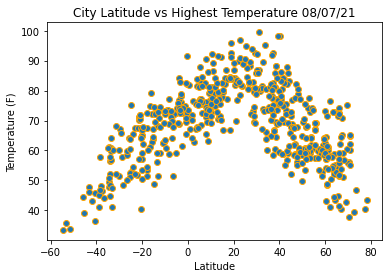

In [29]:
plt.scatter(latitude, maxTemperature, marker = "o", label = "Cities", edgecolor = "orange")
plt.title(f"City Latitude vs Highest Temperature {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("./output/Lat vs. Temp.png")

plt.show()

#it was hottest around 35 latitude and gets colder the further you get away from that latitude

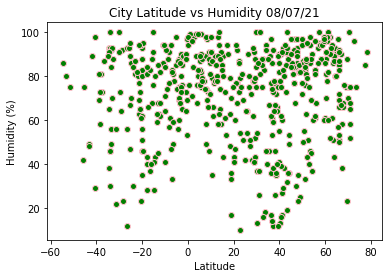

In [34]:
plt.scatter(latitude, humidity, marker = "o", edgecolor = "pink", color = "green")
plt.title(f"City Latitude vs Humidity {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("./output/Lat vs. Humidity.png")
plt.show()

#little change in humidity with change in latitude

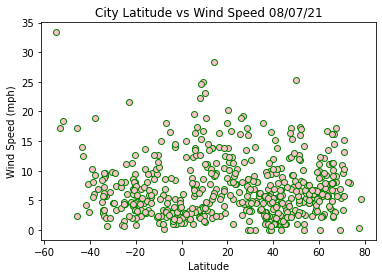

In [32]:
plt.scatter(latitude, wind, marker = "o", edgecolor = "green", color = "pink")
plt.title(f"City Latitude vs Wind Speed {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("./output/Lat vs. Wind Speed.png")
plt.show()

#little change in windspeed with change in latitude

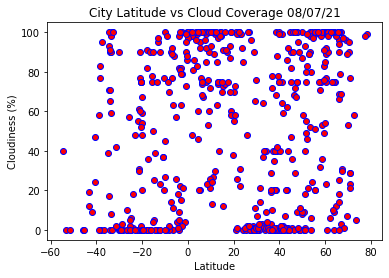

In [35]:
plt.scatter(latitude, cloudCoverage, marker = "o", edgecolor = "blue", color = "red")
plt.title(f"City Latitude vs Cloud Coverage {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("./output/Lat vs. Cloudiness.png")
plt.show()

#there were a lot of clouds just above the equator on this day

In [38]:
#northern and southern hemisphere dataframes
north_df =  cityWeather_df.loc[(cityWeather_df["Latitude:"] >= 0)]
south_df =  cityWeather_df.loc[(cityWeather_df["Latitude:"] < 0)]

In [56]:
def plotLinearRegression(x_values, y_values, yLabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(yLabel)
    print(f"The r-squared is : {rvalue}")
    plt.show()

The r-squared is : -0.6388427581246954


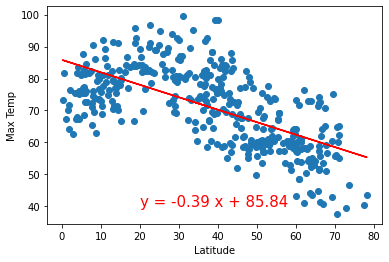

In [60]:
#northern hemisphere - Lat vs Max Temp
x_values = north_df["Latitude:"]
y_values = north_df["Max Temp:"]
plotLinearRegression(x_values, y_values, "Max Temp", (20,40))
#the further north lower the max temp

The r-squared is : 0.7822740804350189


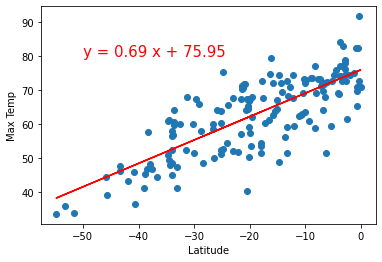

In [63]:
#southern hemisphere - Lat vs Max Temp
x_values = south_df["Latitude:"]
y_values = south_df["Max Temp:"]
plotLinearRegression(x_values, y_values, "Max Temp", (-50,80))
#temperature rises the closer you get to the equator

The r-squared is : -6.538785799114078e-05


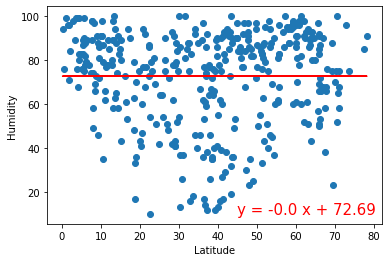

In [67]:
#northern hemisphere - Lat vs Humidity
x_values = north_df["Latitude:"]
y_values = north_df["Humidity:"]
plotLinearRegression(x_values, y_values, "Humidity", (45,10))
#no relationship between humidity and latitude based off the information in this plot

The r-squared is : 0.09215245142626267


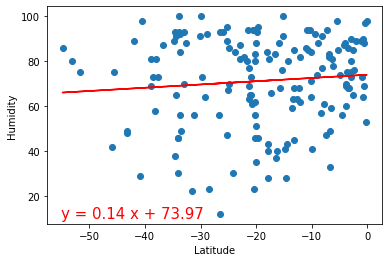

In [69]:
#southern hemisphere - Lat vs Humidity
x_values = south_df["Latitude:"]
y_values = south_df["Humidity:"]
plotLinearRegression(x_values, y_values, "Humidity", (-55,10))
#little relationship between latitude and humidity in the southern hemisphere on this day.

The r-squared is : -0.09022524539674916


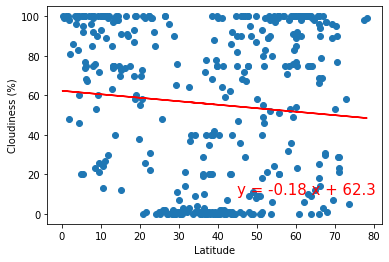

In [72]:
#northern hemisphere - Lat vs Cloudiness
x_values = north_df["Latitude:"]
y_values = north_df["Cloud Coverage:"]
plotLinearRegression(x_values, y_values, "Cloudiness (%)", (45,10))
#small decrease in reported clouds the further north you go in the Northern Hemisphere.

The r-squared is : 0.18839666941634348


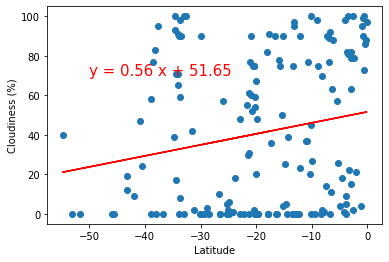

In [74]:
#southern hemisphere - Lat vs Cloudiness
x_values = south_df["Latitude:"]
y_values = south_df["Cloud Coverage:"]
plotLinearRegression(x_values, y_values, "Cloudiness (%)", (-50,70))
#increase in reported clouds the closer to equator

The r-squared is : -0.11425949498427045


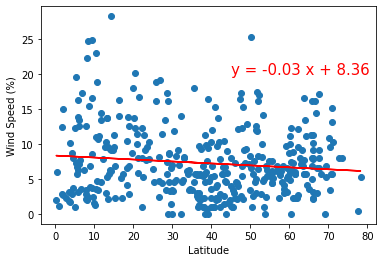

In [76]:
#northern hemisphere - Lat vs Wind Speed
x_values = north_df["Latitude:"]
y_values = north_df["Wind:"]
plotLinearRegression(x_values, y_values, "Wind Speed (%)", (45,20))
#little relationship between windspeed and latitude in the northern hemisphere

The r-squared is : -0.3419060758991108


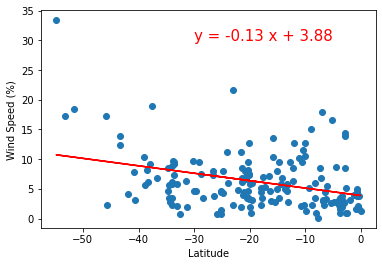

In [78]:
#southern hemisphere - Lat vs Wind Speed
x_values = south_df["Latitude:"]
y_values = south_df["Wind:"]
plotLinearRegression(x_values, y_values, "Wind Speed (%)", (-30,30))
#higher reported wind speed the closer to the equator within the southern hemisphere